## <font color='green'>A special thanks to all my mentors for helping me constantly to progress technically</font>
## Jupyter notebook prepared, arranged and executed by <font color='red'>Karthi Balasundaram</font> , <font color='blue'> sentimentally analysing Russian Ukraine War using real tweet data from twitter.</font>

In [3]:
# installing natural language toolkit(nltk)
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.5 MB 2.4 MB/s            
     |████████████████████████████████| 288 kB 2.6 MB/s            
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [9]:
# installing openpyxl (a python library to read/write excel files)
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 242 kB 1.7 MB/s            
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [4]:
#importing other default and necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import re
import nltk
from nltk.util import pr
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')
stemmer = nltk.SnowballStemmer("english")
nltk.download('stopwords')
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/karthibalasundaram/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [111]:
#reading the excel file using pandas library
data = pd.read_excel("/Users/karthibalasundaram/Downloads/Russia_Ukraine_war/war_tweets.xlsx")

In [112]:
#the below line calls last 5 rows from the excel
data.tail()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
10009,1.504308e+18,1.503516e+18,2022-03-17 04:06:25 UTC,2022-03-17,04:06:25,0.0,1.486028e+18,meadowslana1,Meadows Lana,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'EugeneTrevino73', 'name': 'E...",NaN,NaN,NaN,NaN
10010,1.504308e+18,1.504308e+18,2022-03-17 04:06:24 UTC,2022-03-17,04:06:24,0.0,1.504306e+18,sammynicoet,Jesse Jo,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
10011,1.504308e+18,1.486862e+18,2022-03-17 04:06:24 UTC,2022-03-17,04:06:24,0.0,1.470945e+18,sabrina15647051,Sabrina Schroeder,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'ACMillerAuthor', 'name': 'A....",NaN,NaN,NaN,NaN
10012,1.504308e+18,1.504289e+18,2022-03-17 04:06:24 UTC,2022-03-17,04:06:24,0.0,1.239372e+18,wow33396307,ì•„ë¹,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'ua_industrial', 'name': 'ÐŸÑ...",NaN,NaN,NaN,NaN
10013,1.504308e+18,1.504111e+18,2022-03-17 04:06:23 UTC,2022-03-17,04:06:23,0.0,1.464508e+18,piotrtrebisz,Piotr Trebisz ðŸŒ» ðŸ‡ºðŸ‡¦ ðŸ‡ºðŸ‡¦ ðŸ‡ºðŸ‡¦ ...,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'therudraAU', 'name': 'Rudra ...",NaN,NaN,NaN,NaN


In [113]:
#the below line calls first 5 rows from the excel
data.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1.504326e+18,1.504083e+18,2022-03-17 05:15:51 UTC,2022-03-17,05:15:51,0.0,1.016938e+09,bowtiedbeyonce,Michael John,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'PeterSchiff', 'name': 'Peter...",NaN,NaN,NaN,NaN
1,1.504326e+18,1.504323e+18,2022-03-17 05:15:51 UTC,2022-03-17,05:15:51,0.0,1.420232e+18,theshydoomer,THE SHY DOOMER ðŸ‡ºðŸ‡¦,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'meatballsubzero', 'name': 'Ñ...",NaN,NaN,NaN,NaN
2,1.504326e+18,1.504326e+18,2022-03-17 05:15:51 UTC,2022-03-17,05:15:51,0.0,1.387731e+18,rosaort91373426,Rosa Ortiz,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1.504326e+18,1.504326e+18,2022-03-17 05:15:50 UTC,2022-03-17,05:15:50,0.0,5.421008e+07,woodsallan,Allan Woods,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1.504326e+18,1.504325e+18,2022-03-17 05:15:50 UTC,2022-03-17,05:15:50,0.0,6.432839e+07,artemistweet,Artemis,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'BW', 'name': 'Businessweek',...",NaN,NaN,NaN,NaN


In [114]:
#understanding rows and columns present in the excel
data.shape

(10014, 36)

In [115]:
#retreives basic info about the excel data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10014 entries, 0 to 10013
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               10014 non-null  float64       
 1   conversation_id  10014 non-null  float64       
 2   created_at       10014 non-null  object        
 3   date             10014 non-null  datetime64[ns]
 4   time             10014 non-null  object        
 5   timezone         10014 non-null  float64       
 6   user_id          10014 non-null  float64       
 7   username         10014 non-null  object        
 8   name             10014 non-null  object        
 9   place            1 non-null      object        
 10  tweet            10014 non-null  object        
 11  language         10014 non-null  object        
 12  mentions         10014 non-null  object        
 13  urls             10014 non-null  object        
 14  photos           10014 non-null  objec

In [116]:
#a brief description about the data
data.describe()

,id,conversation_id,timezone,user_id,replies_count,retweets_count,likes_count,video,near,geo,source,user_rt_id,user_rt,retweet_id,retweet_date,translate,trans_src,trans_dest
count,1.001400e+04,1.001400e+04,10014.0,1.001400e+04,10014.000000,10014.000000,10014.000000,10014.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1.504317e+18,1.502877e+18,0.0,6.984499e+17,0.313661,0.552227,2.090873,0.093469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,5.075717e+12,2.728863e+16,0.0,6.443610e+17,2.549457,10.848945,45.884702,0.291103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.504308e+18,4.371802e+17,0.0,7.421430e+05,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.504312e+18,1.504181e+18,0.0,4.921743e+08,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.504317e+18,1.504309e+18,0.0,8.388104e+17,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.504321e+18,1.504316e+18,0.0,1.354872e+18,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.504326e+18,1.504326e+18,0.0,1.504322e+18,142.000000,666.000000,3978.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
data.isnull().sum()

id                     0
conversation_id        0
created_at             0
date                   0
time                   0
timezone               0
user_id                0
username               0
name                   0
place              10013
tweet                  0
language               0
mentions               0
urls                   0
photos                 0
replies_count          0
retweets_count         0
likes_count            0
hashtags               0
cashtags               0
link                   0
retweet                0
quote_url           9138
video                  0
thumbnail           9078
near               10014
geo                10014
source             10014
user_rt_id         10014
user_rt            10014
retweet_id         10014
reply_to               0
retweet_date       10014
translate          10014
trans_src          10014
trans_dest         10014
dtype: int64

In [118]:
#retreives all the columns
data.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [119]:
#lists first 5 data(tweets) listed under the column "tweet"
data[["tweet"]].head()

,tweet
0,@PeterSchiff @PadaPrabu @SteveKrohn1 If it wer...
1,@meatballsubzero Are you pro russia or pro Ukr...
2,@SUBWAY Please stop doing business in Russia....
3,Is Russia prepared for an economic crisis? Dev...
4,@BW Putin is Fake News ðŸ“° The Ruble is trash...


In [120]:
#lists first 5 data(username) listed under the column "username"
data[["username"]].head()

,username
0,bowtiedbeyonce
1,theshydoomer
2,rosaort91373426
3,woodsallan
4,artemistweet


In [121]:
#lists first 5 data(langauge) listed under the column "language"
data[["language"]].head()

,language
0,en
1,en
2,en
3,en
4,en


In [122]:
#displays the tweets posted in corresponding languages
data["language"].value_counts()

en     9018
pt      211
und     158
it      118
hi       80
in       79
ru       69
ja       54
es       22
pl       19
tl       18
nl       15
de       14
ar       13
fr       13
zh       11
th       10
ca        9
ta        8
ro        6
et        6
bn        5
fi        5
mr        5
ne        5
or        5
uk        4
kn        4
cs        4
ml        4
te        3
el        3
ur        3
no        3
gu        3
tr        2
iw        2
sl        1
am        1
fa        1
Name: language, dtype: int64

In [123]:
#lists first 5 data(URL's) listed under the column "link"
data[["link"]].head()

,link
0,https://twitter.com/bowtiedbeyonce/status/1504...
1,https://twitter.com/TheShyDoomer/status/150432...
2,https://twitter.com/RosaOrt91373426/status/150...
3,https://twitter.com/WoodsAllan/status/15043256...
4,https://twitter.com/ArtemisTweet/status/150432...


In [124]:
#sorting the languages
pi = data.language.value_counts().sort_values()

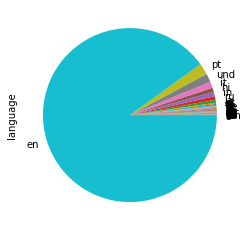

In [125]:
#displaying the sorted lanuages in a pie chart
displ = pi.plot(kind = 'pie')

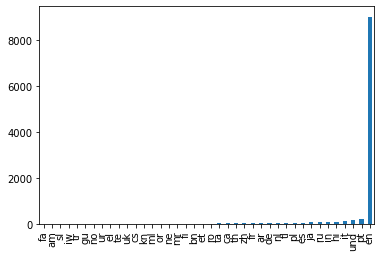

In [126]:
#displaying the sorted lanuages in a bar chart
displ1 = pi.plot(kind = 'bar')

In [127]:
#displays the 369th tweet
data["tweet"][369]

'@MarshaHairbrush @RusEmbJakarta @mfa_russia @natomission_ru @NATO @Kemlu_RI @RusEmbUSA @RusEmbIndia @EmbassyofRussia  https://t.co/dSosWvqgMo'

In [128]:
# defining function for twitter hashtag extraction to classify sentiment analysis
def hashtag_extract(text_list):
    hashtags = []
    for text in text_list:
        ht = re.findall(r"#(\w+)", text)
        hashtags.append(ht)  
    return hashtags

In [133]:
#importing seaborn library
import seaborn as sns

In [134]:
# defining function for generating frequent hashtag used
def generate_hashtag_freqdist(hashtags):
    a = nltk.FreqDist(hashtags)
    b = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())})
    # selecting top 15 most frequent hashtags
    b = b.nlargest(columns="Count", n = 25)
    plt.figure(figsize=(16,7))
    ax = sns.barplot(data=b, x= "Hashtag", y = "Count")
    plt.xticks(rotation=80)
    ax.set(ylabel = 'Count')
    plt.show()

In [135]:
hashtags = hashtag_extract(data["tweet"])
hashtags = sum(hashtags, [])

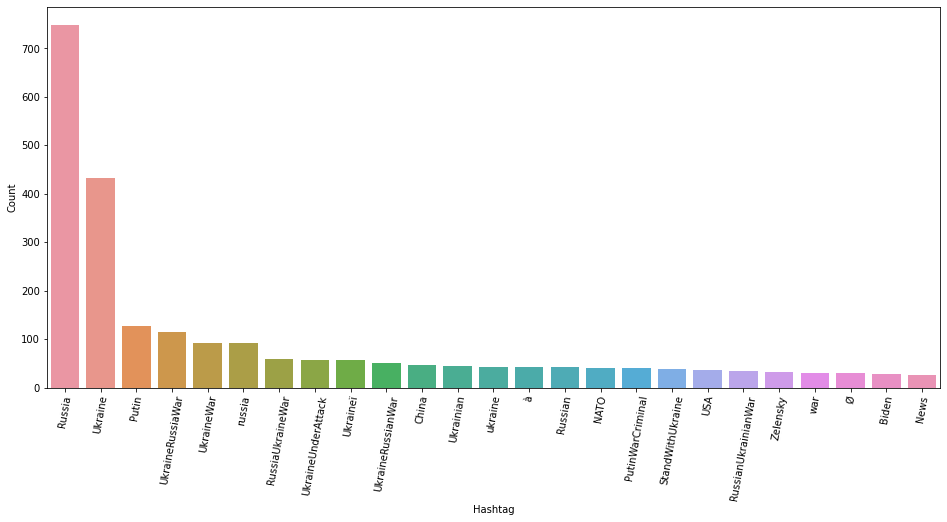

In [136]:
#frequently used hastags are displayed using seaborn library
generate_hashtag_freqdist(hashtags)

In [188]:
data['total_length_characters'] = data['tweet'].str.len()
print(data['total_length_characters'])
total_length_characters = data['total_length_characters'].sum()
print(total_length_characters)
count = 0
for y in data["tweet"]:
    count = count + 1
print(count)
average_length = total_length_characters / count
print (average_length)

0        130
1        162
2        167
3        220
4         87
        ... 
10009    255
10010     84
10011    176
10012    249
10013    216
Name: total_length_characters, Length: 10014, dtype: int64
1831052
10014
182.84921110445376


In [189]:
data['total_count_words'] = data['tweet'].str.split().str.len()
print(data['total_count_words'])
total_words = data['total_count_words'].sum()
print(total_words)
count = 0
for y in data["tweet"]:
    count = count + 1
print(count)
average_words = total_words / count
print (average_words)

0        22
1        28
2        26
3        32
4        15
         ..
10009    44
10010    11
10011    32
10012    39
10013    32
Name: total_count_words, Length: 10014, dtype: int64
271703
10014
27.13231475933693


In [190]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

In [191]:
data['total_length_characters'] = data['tweet'].str.len()
print(data['total_length_characters'])
total_length_characters = data['total_length_characters'].sum()
print("Total_length :",total_length_characters)
count = 0
for y in data["tweet"]:
    count = count + 1
print("Total_rows :",count)
average_length = total_length_characters / count
print ("Averge length :",average_length)

0         64
1         98
2        121
3        134
4         59
        ... 
10009    126
10010     74
10011    115
10012    130
10013    137
Name: total_length_characters, Length: 10014, dtype: int64
Total_length : 1142035
Total_rows : 10014
Averge length : 114.04383862592371


In [192]:
data['total_count_words'] = data['tweet'].str.split().str.len()
print(data['total_count_words'])
total_words = data['total_count_words'].sum()
print(total_words)
count = 0
for y in data["tweet"]:
    count = count + 1
print(count)
average_words = total_words / count
print (average_words)

0         9
1        16
2        19
3        19
4        11
         ..
10009    20
10010    10
10011    19
10012    20
10013    18
Name: total_count_words, Length: 10014, dtype: int64
163674
10014
16.344517675254643


In [68]:
!pip3 install textblob

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 636 kB 1.7 MB/s            
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [193]:
from textblob import TextBlob

In [194]:
def analyze_sentiment(tweet):
    analysis = TextBlob(clean(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [195]:
data['Sentiment'] = data['tweet'].apply(lambda x:analyze_sentiment(x))
data['Source'] = 'random_user'
data['Length'] = data['tweet'].apply(len)
data['Word_counts'] = data['tweet'].apply(lambda x:len(str(x).split()))

In [196]:
data1=data[['tweet','retweets_count', 'Sentiment', 'Source',
'Length','Word_counts']]
data1.head()

,tweet,retweets_count,Sentiment,Source,Length,Word_counts
0,peterschiff padaprabu would shit pant chang n...,0.0,-1,random_user,64,9
1,meatballsubzero pro russia pro ukrain cannot ...,0.0,0,random_user,98,16
2,subway pleas stop busi russia everi dollar sp...,0.0,1,random_user,121,19
3,russia prepar econom crisi develop expert nata...,0.0,0,random_user,134,19
4,bw putin fake news ðÿ“° rubl trash ðÿ— russia...,0.0,-1,random_user,59,11


In [197]:
data1['Clean tweet'] = data1['tweet'].apply(lambda x:clean(x))

In [198]:
data1[["Clean tweet","Sentiment"]].iloc[369]

Clean tweet    marshahairbrush rusembjakarta mfarussia natomi...
Sentiment                                                      0
Name: 369, dtype: object

In [200]:
#displaying total number of neutral, positive and negative sentiments
sentiment = data1['Sentiment'].value_counts()
sentiment

 0    5094
 1    2788
-1    2132
Name: Sentiment, dtype: int64

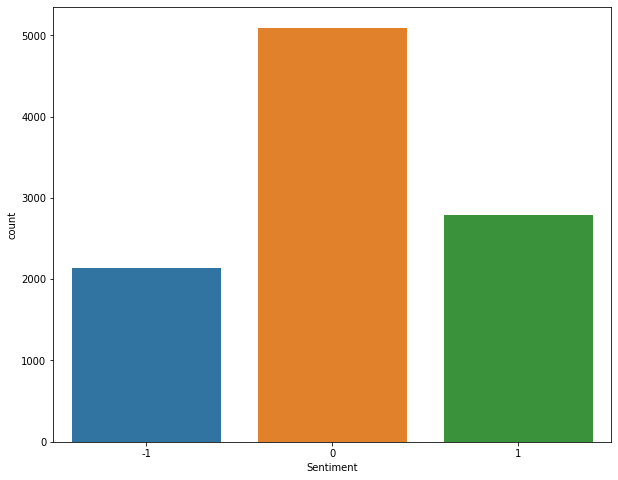

In [201]:
#plotting the sentiments using seaborn library
plt.figure(figsize = (10,8))
sns.countplot(data = data1, x = 'Sentiment')
plt.show()

In [202]:
#defining values for neutral, positive and negative sentiments as 0, 1 and -1 respectively
neutral = data1[data1['Sentiment'] == 0]
positive = data1[data1['Sentiment'] == 1]
negative = data1[data1['Sentiment'] == -1]

In [203]:
#retrieving details about 2001th negative tweet
negative.iloc[2001]

tweet             russia would like get game
retweets_count                           0.0
Sentiment                                 -1
Source                           random_user
Length                                    26
Word_counts                                5
Clean tweet       russia would like get game
Name: 9385, dtype: object

In [204]:
#retrieving details about 400th postive tweet
positive.iloc[400]

tweet             one thing love russia there much steak japan
retweets_count                                             0.0
Sentiment                                                    1
Source                                             random_user
Length                                                      44
Word_counts                                                  8
Clean tweet             one thing love russia much steak japan
Name: 1428, dtype: object

In [205]:
#retrieving details about 4300th neutral tweet
neutral.iloc[4300]

tweet             kyivindepend russia lost  lost 
retweets_count                                0.0
Sentiment                                       0
Source                                random_user
Length                                         31
Word_counts                                     4
Clean tweet       kyivindepend russia lost  lost 
Name: 8454, dtype: object

In [206]:
print ("***************************************************************************************************")
#neutral_tweet
print("Example of a neutral tweet :",neutral['tweet'].values[3])
print ("***************************************************************************************************")
#positive tweet
print("Example of a positive tweet :",positive['tweet'].values[6])
print ("***************************************************************************************************")
#negative_text
print("Example of a negative tweet :",negative['tweet'].values[9])
print ("***************************************************************************************************")

***************************************************************************************************
Example of a neutral tweet : prayerfeath russia putin war crimin putin held account russia choke sanctionsaggress invas  total unaccept russia etern dame
***************************************************************************************************
Example of a positive tweet : itâ€™ show  america amp nato arenâ€™t tri win ground war russia give scrap ukrain compar could give  zelenski isnâ€™t tri strike deal  long go drag
***************************************************************************************************
Example of a negative tweet : mani compani step help put pressur russia list havent long includ reebok eddiebau ninewest subway halliburton dunkindonut generalmil hiltonhotel marriott hyatt mani  
***************************************************************************************************


In [207]:
from wordcloud import WordCloud

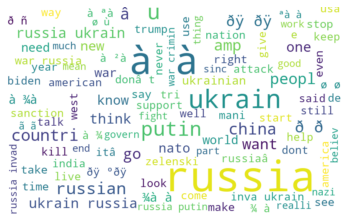

In [208]:
txt = ' '.join(text for text in data1['Clean tweet'])
wordcloud = WordCloud(
            background_color = 'white',
            max_font_size = 100,
            max_words = 100,
            width = 800,
            height = 500
            ).generate(txt)
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

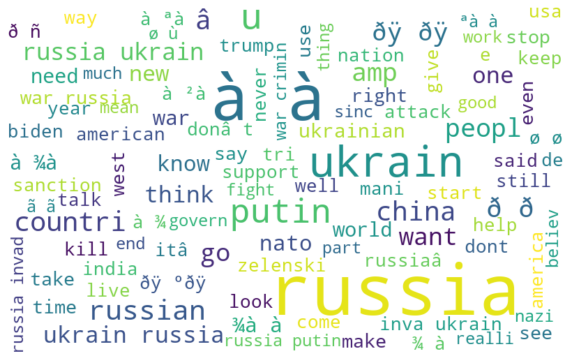

In [209]:
#displaying the positive words using wordcloud
positive_words =' '.join([text for text in data1['Clean tweet'][data1['Sentiment'] == 1]])
#wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)
wordcloud1 = WordCloud(
            random_state=21,
            max_font_size = 110,
            max_words = 100,
            width = 800,
            height = 500
            ).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

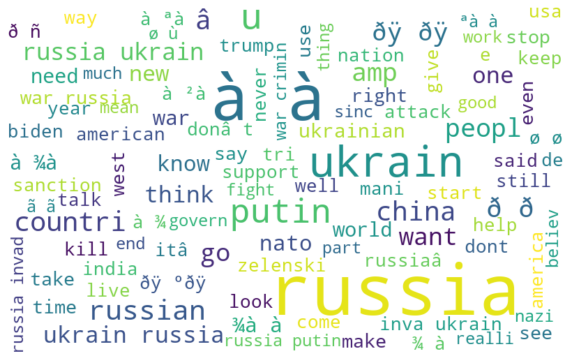

In [210]:
#displaying the negative words using wordcloud
negative_words =' '.join([text for text in data1['Clean tweet'][data1['Sentiment'] == 1]])
#wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)
wordcloud1 = WordCloud(
            random_state=21,
            max_font_size = 110,
            max_words = 100,
            width = 800,
            height = 500
            ).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

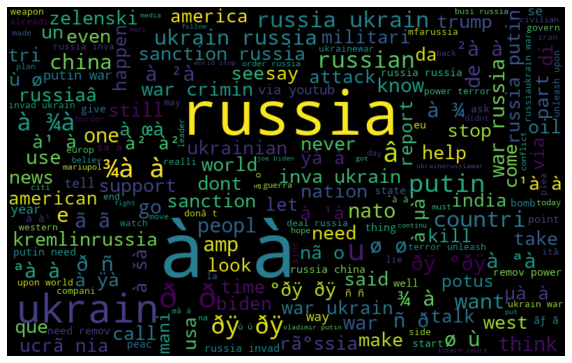

In [102]:
#displaying the neutral words using wordcloud
neutral_words =' '.join([text for text in data1['Clean tweet'][data1['Sentiment'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neutral_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Thank you for time.
## <font color= 'red'>Dataset may be shared upon request.</font>